In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
df=pd.read_csv("C:\\datasets\\ToyotaCorolla.csv")

In [4]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [7]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
data=pd.DataFrame({'Price':df['Price'], 'Age':df['Age_08_04'], 'KM':df['KM'],'HP':df['HP'], 'cc':df['cc'], 'Doors':df['Doors'], 'Gears':df['Gears'], 'QTax':df['Quarterly_Tax'], 'Weight':df['Weight']})

In [9]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTax', 'Weight'], dtype='object')

data.describe()

In [11]:
data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
QTax      int64
Weight    int64
dtype: object

In [12]:
data.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QTax      0
Weight    0
dtype: int64

In [13]:
data.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [14]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data=data.reset_index()

In [17]:
data

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
data=data.drop('index',axis=1)

In [19]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


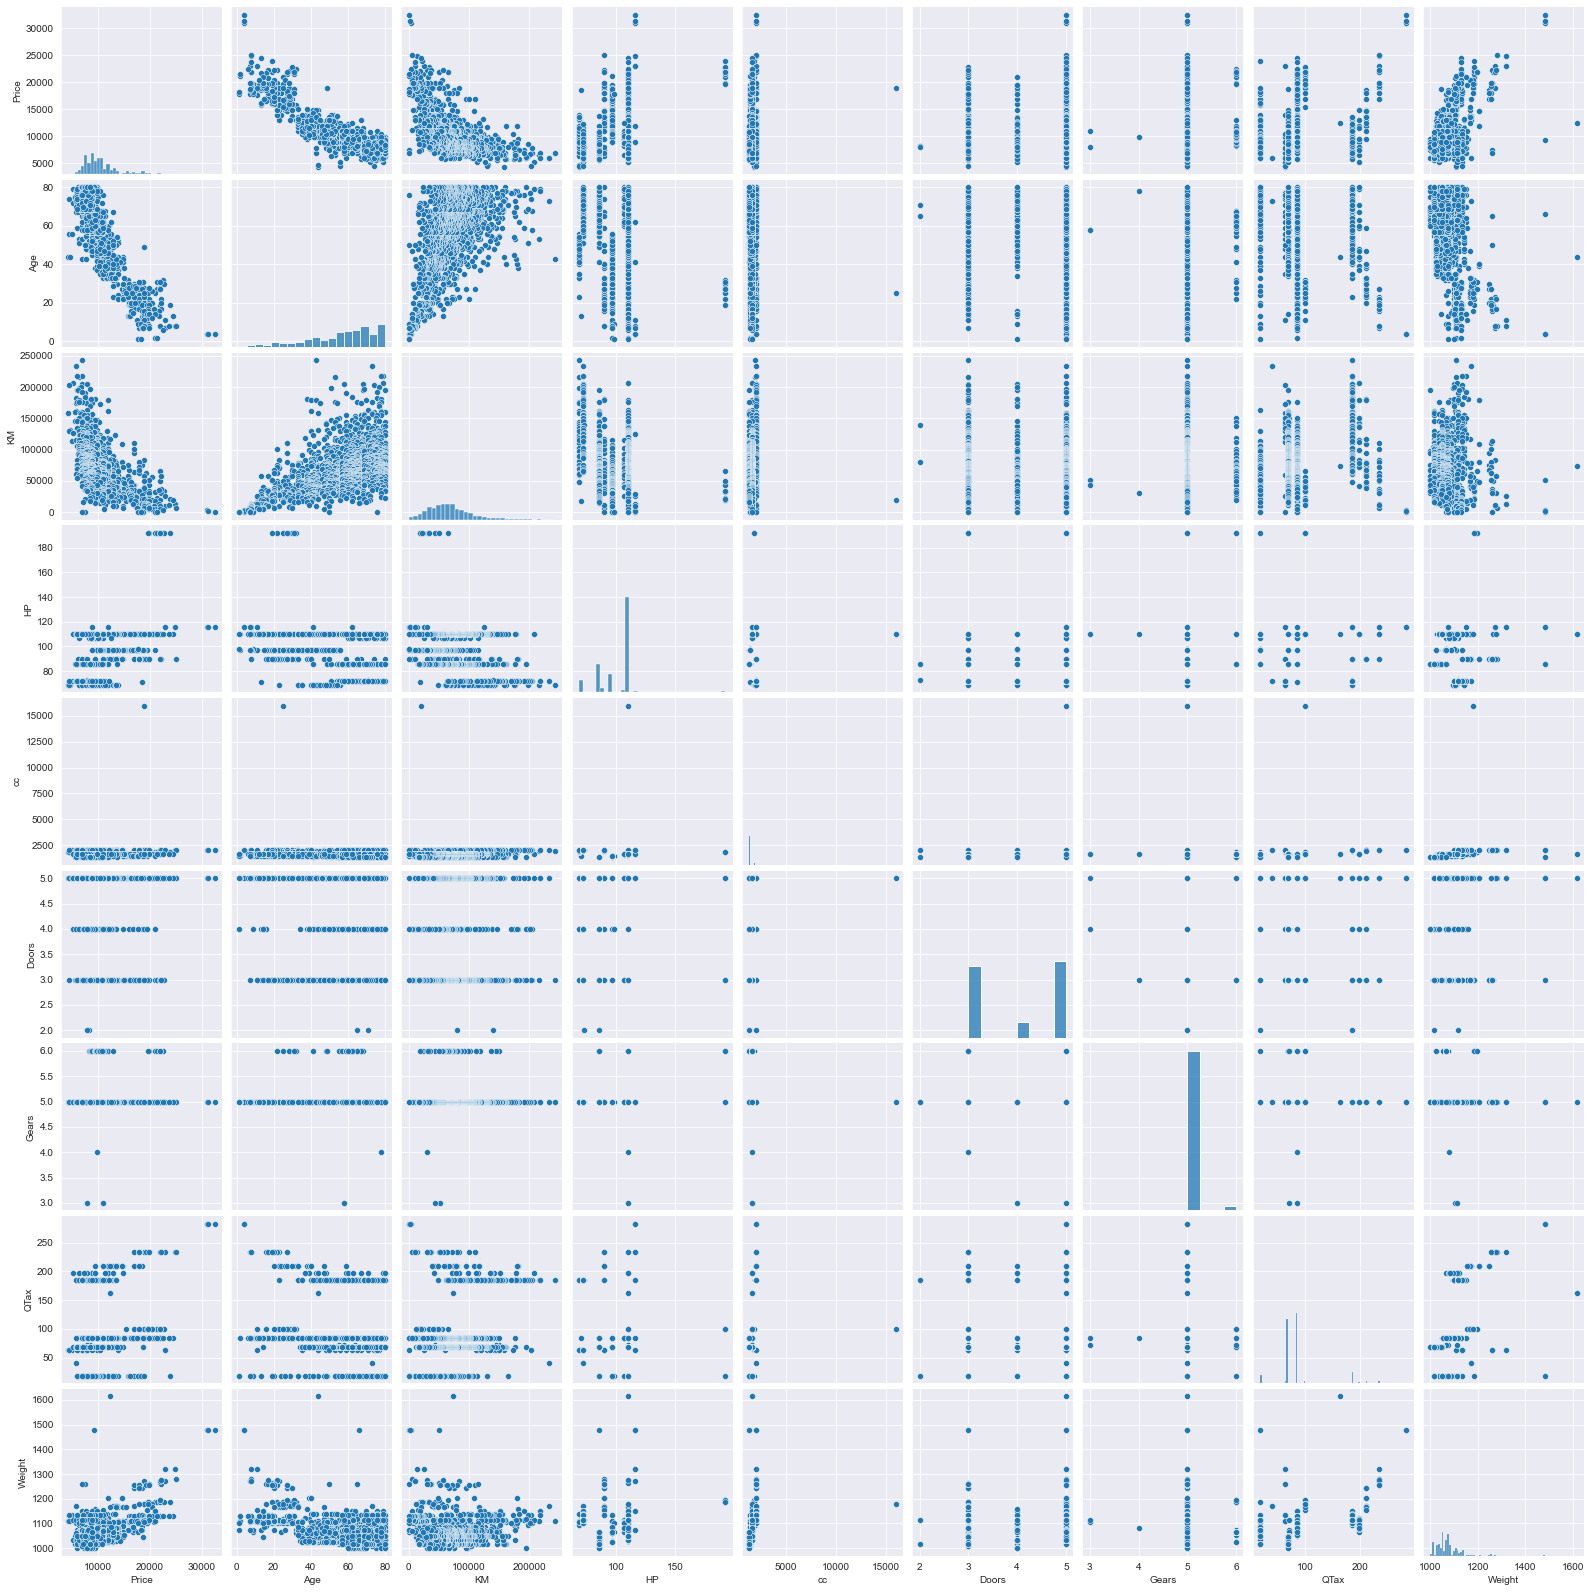

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [21]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# removing gears column as it has very less correlation with Price

In [22]:
data=data.drop('Gears',axis = 1)

# Quarterly tax and weight has relatively high positive correlation
If age of the vechicle increases the price of the vechicle decreases
if the amount of vechicle travelled increases then the price of the vechicle decreases
There is no correlation between HorsePower and Price if the HP increases then the price increases constantly
there is no correlation between CC and Price all the vechicles are having same cc hence we can ignore cc


In [23]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+QTax+Weight',data=data).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:43:32   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
Age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
HP            33.6479      2.742     12.270      0.000      28.269      39.027
cc            -0.1227      0.090     -1.358      0.175      -0.300       0.054
Doors        -23.9806     39.372     -0.609      0.543    -101.214      53.253
QTax           4.0353      1.313      3.073      0.002       1.459       6.611
Weight        16.8844      1.072     15.743      0.000      14.781      18.988
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model.fittedvalues

0       16828.839912
1       16298.032122
2       16814.888187
3       16442.555915
4       16233.902063
            ...     
1430     8783.176655
1431     8280.370295
1432     8442.799294
1433     8566.692519
1434    10374.167169
Length: 1435, dtype: float64

In [26]:
model.params

Intercept   -2636.384329
Age          -121.847802
KM             -0.020454
HP             33.647877
cc             -0.122677
Doors         -23.980630
QTax            4.035301
Weight         16.884429
dtype: float64

In [27]:
model.pvalues

Intercept     1.313394e-02
Age          6.480986e-288
KM            4.646226e-55
HP            5.622551e-33
cc            1.745423e-01
Doors         5.425721e-01
QTax          2.158809e-03
Weight        1.297391e-51
dtype: float64

the p value is less than 0.5 in doors and cc

In [28]:
model=smf.ols('Price~cc',data= data).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.29e-06
Time:                        19:43:33   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model = smf.ols('Price~Doors' , data=data).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.40e-12
Time:                        19:43:33   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# considering the rsqaured value is very low in cc ,so we drop the cc

In [32]:
data=data.drop('cc',axis=1)

In [33]:
data

,Price,Age,KM,HP,Doors,QTax,Weight
0,13500,23,46986,90,3,210,1165
1,13750,23,72937,90,3,210,1165
2,13950,24,41711,90,3,210,1165
3,14950,26,48000,90,3,210,1165
4,13750,30,38500,90,3,210,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,69,1025
1431,10845,72,19000,86,3,69,1015
1432,8500,71,17016,86,3,69,1015
1433,7250,70,16916,86,3,69,1015


In [34]:
model= smf.ols('Price~Age+KM+HP+Doors+QTax+Weight',data=data).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1480.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:43:33   Log-Likelihood:                -12372.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2518.7574   1058.453     -2.380      0.017   -4595.046    -442.468
Age         -121.8917      2.622    -46.483      0.000    -127.036    -116.748
KM            -0.0206      0.001    -16.455      0.000      -0.023      -0.018
HP            33.3055      2.731     12.194      0.000      27.947      38.663
Doors        -23.2523     39.380     -0.590      0.555    -100.502      53.997
QTax           3.8184      1.304      2.929      0.003       1.261       6.376
Weight        16.6515      1.059     15.724      0.000      14.574      18.729
==============================================================================
Omnibus:                      145.933   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.411
Skew:                          -0.206   Prob(JB):                    2.78e-204
Kurtosis:                       6.938   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
vif1=smf.ols('Age~KM+HP+Doors+QTax+Weight',data=data).fit().rsquared

In [37]:
vif_age=1/(1-vif1)
vif_age

1.8754157698689957

In [38]:
vif2=smf.ols('KM~Age+HP+Doors+QTax+Weight',data=data).fit().rsquared

In [39]:
vif_km=1/(1-vif2)
vif_km

1.7389173124604942

In [40]:
vif3=smf.ols('HP~Age+KM+Doors+QTax+Weight',data=data).fit().rsquared
vif_hp=1/(1-vif3)
vif_hp

1.325245856832752

In [41]:
vif4=smf.ols('Doors~Age+KM+HP+QTax+Weight',data=data).fit().rsquared
vif_doors=1/(1-vif4)
vif_doors

1.1139391313630986

In [42]:
vif5=smf.ols('QTax~Age+KM+HP+Doors+Weight',data=data).fit().rsquared
vif_QTax=1/(1-vif5)
vif_QTax

2.256997248985599

In [43]:
vif6=smf.ols('Weight~Age+KM+HP+Doors+QTax',data=data).fit().rsquared
vif_Weight=1/(1-vif6)
vif_Weight

2.423422626616171

In [44]:
d1={"variables":['Age','HP','KM','Doors','QTax','Weight'],"vif":[1.87,1.73,1.32,1.11,2.25,2.42]}

In [45]:
viftable=pd.DataFrame(d1)

In [46]:
viftable

,variables,vif
0,Age,1.87
1,HP,1.73
2,KM,1.32
3,Doors,1.11
4,QTax,2.25
5,Weight,2.42


In [47]:
model.resid

0      -3339.719690
1      -2555.830091
2      -2876.350450
3      -1503.183434
4      -2494.317424
           ...     
1430   -1273.854299
1431    2571.571462
1432      63.862906
1433   -1310.086141
1434   -3437.132174
Length: 1435, dtype: float64

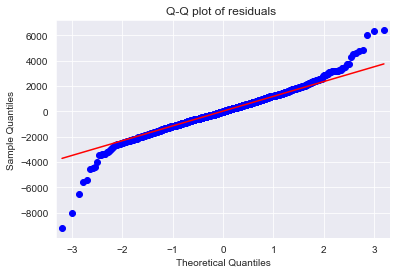

In [48]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals ")
plt.show()

<AxesSubplot:>

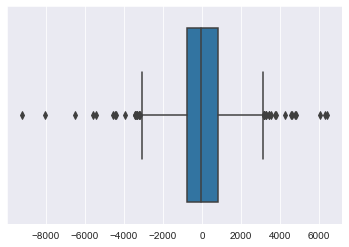

In [49]:
sns.boxplot(model.resid)

In [50]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

0       1.826821
1       1.667423
2       1.822829
3       1.711417
4       1.649058
          ...   
1430   -0.581312
1431   -0.730718
1432   -0.682140
1433   -0.645134
1434   -0.099654
Length: 1435, dtype: float64
0      -2.486321
1      -1.902739
2      -2.141356
3      -1.119075
4      -1.856944
          ...   
1430   -0.948346
1431    1.914458
1432    0.047544
1433   -0.975320
1434   -2.558842
Length: 1435, dtype: float64


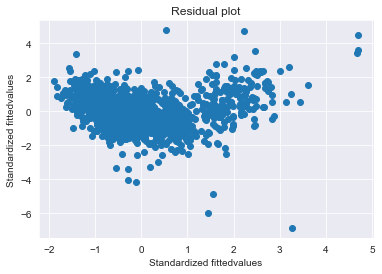

In [51]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fittedvalues')
plt.ylabel('Standardized residuals')
plt.show()

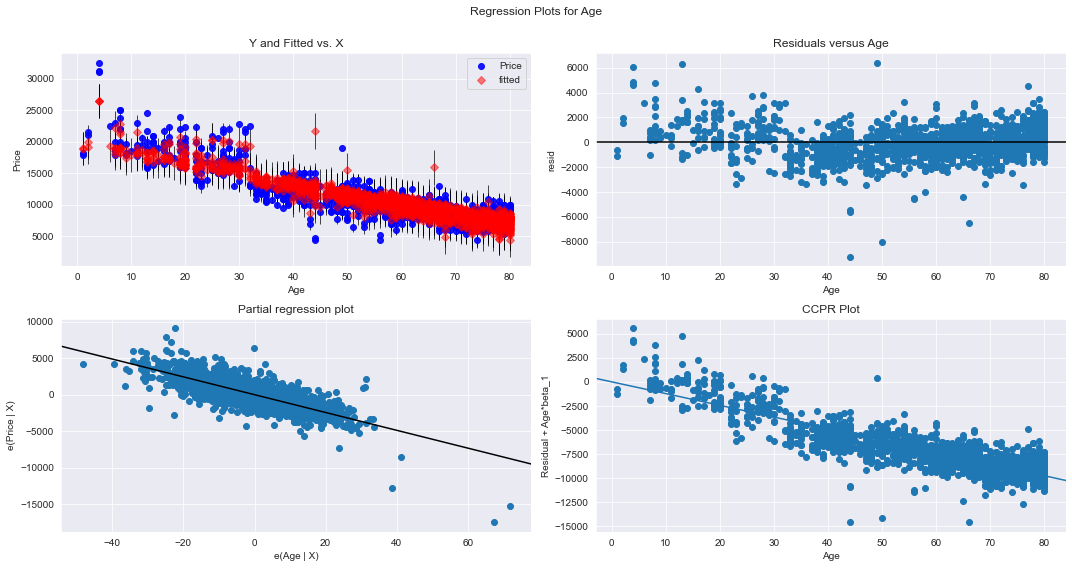

In [52]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

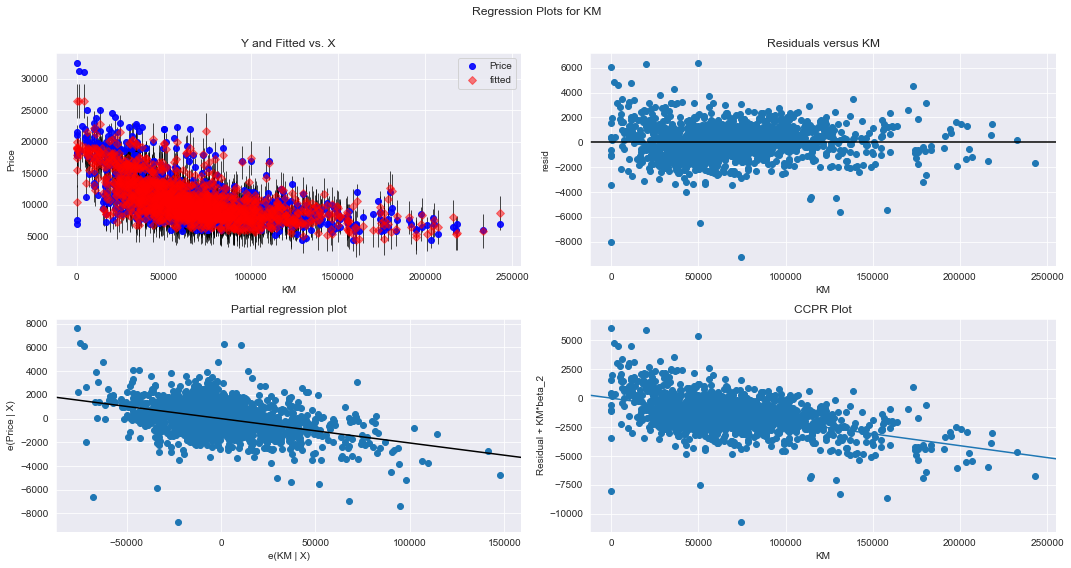

In [53]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

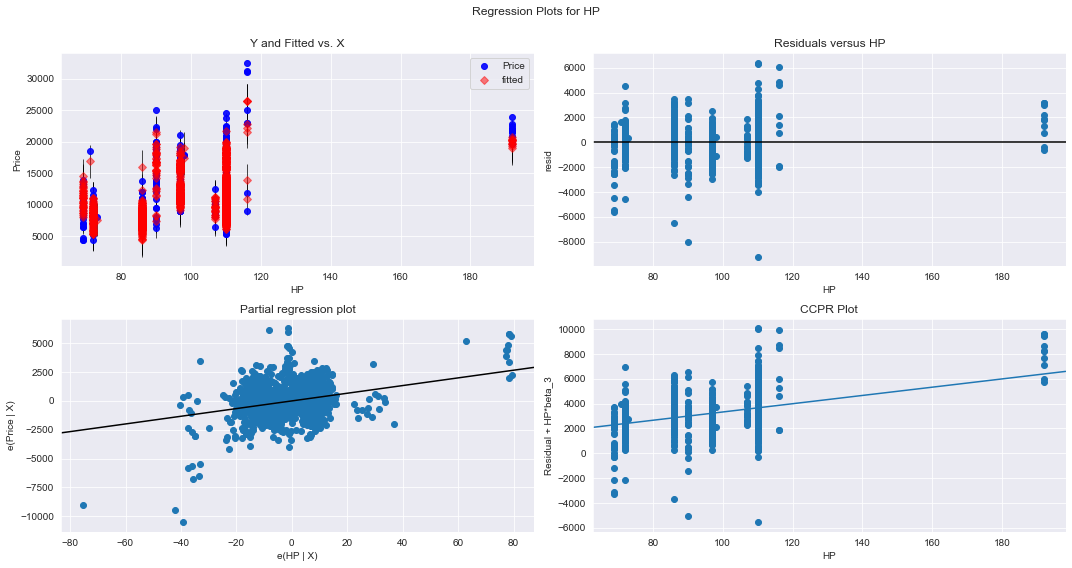

In [54]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()


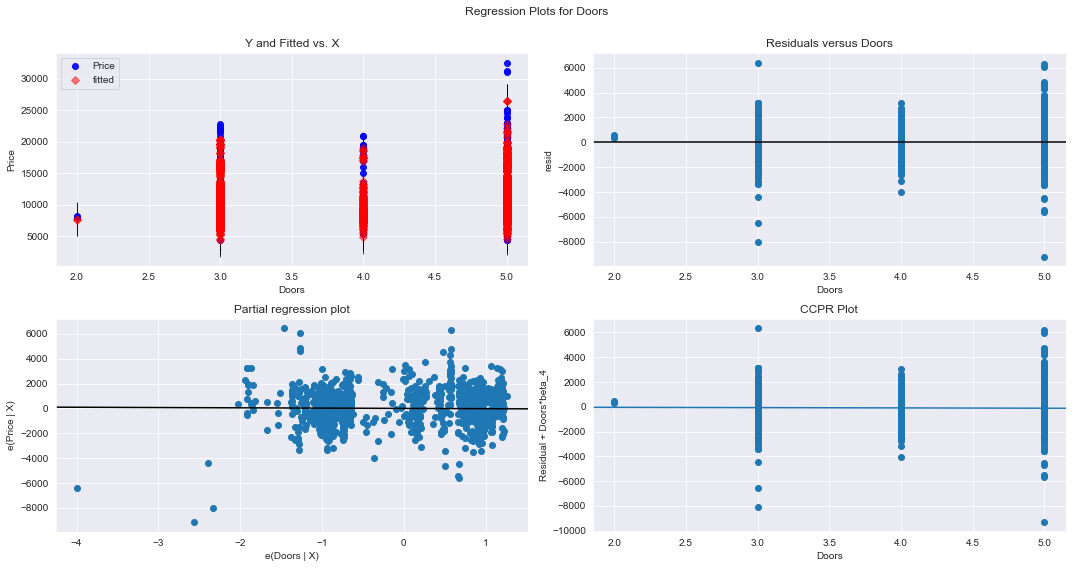

In [55]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

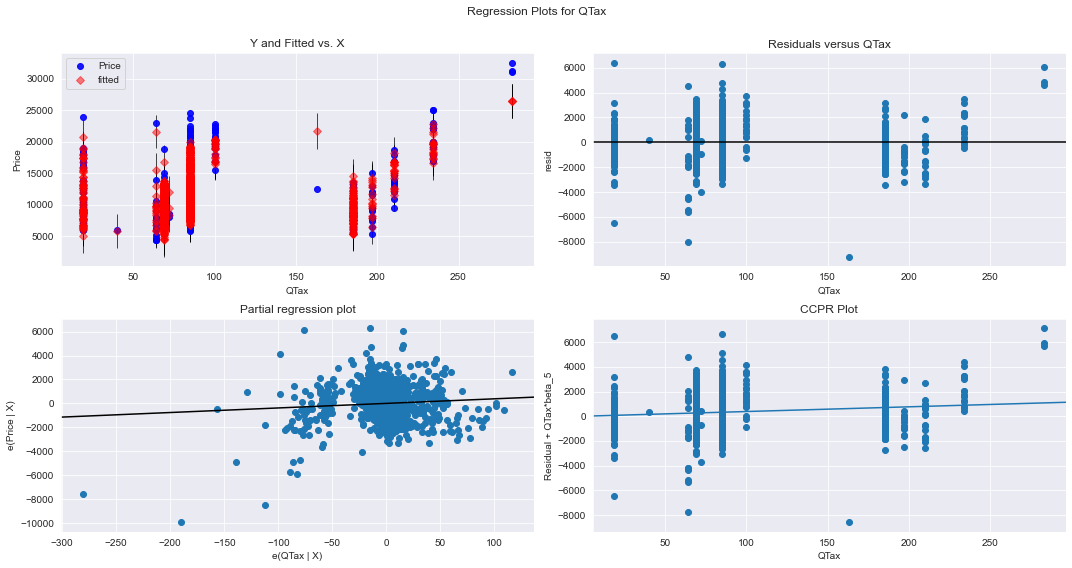

In [56]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"QTax",fig=fig)
plt.show()

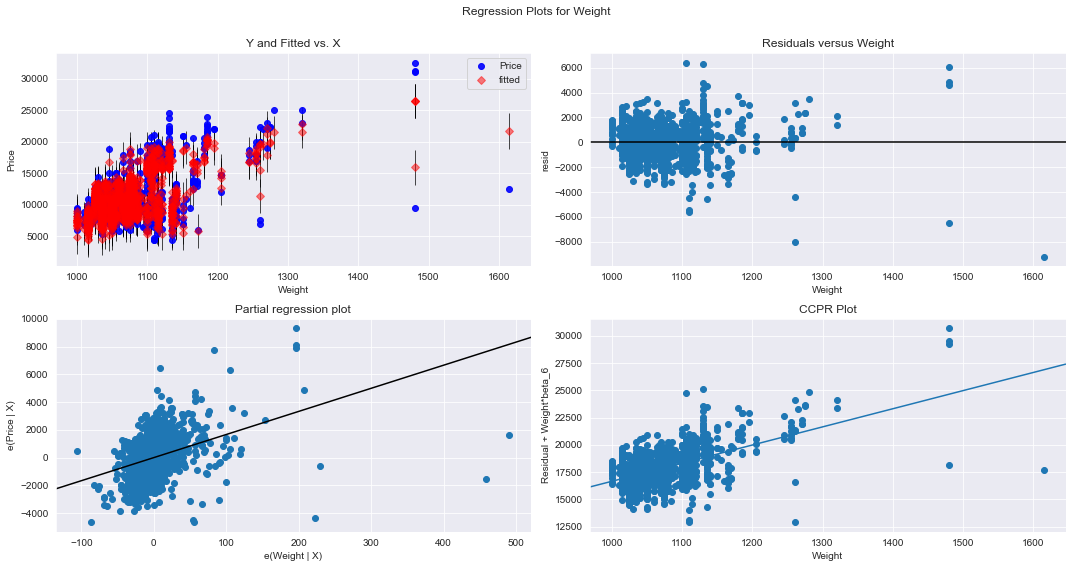

In [57]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

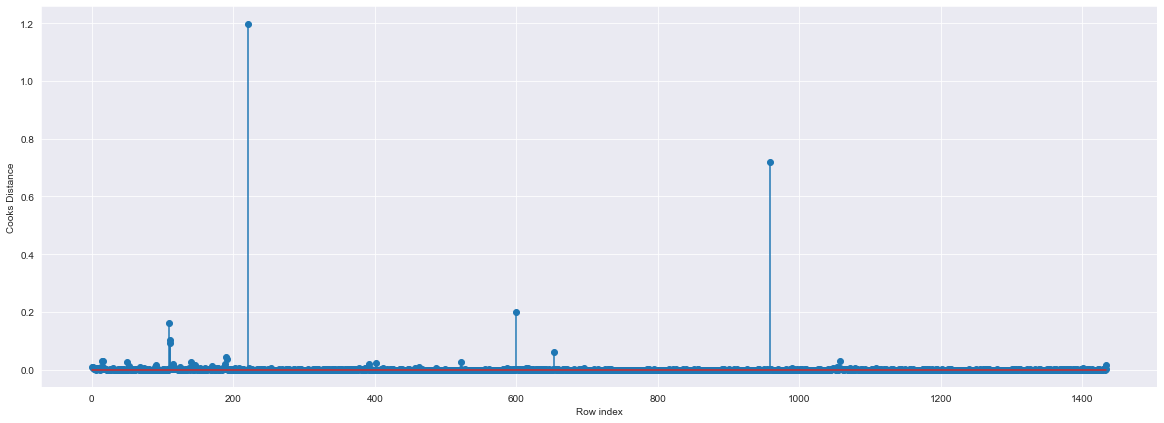

In [59]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
(np.argmax(c),np.max(c))

(220, 1.1987544668625396)

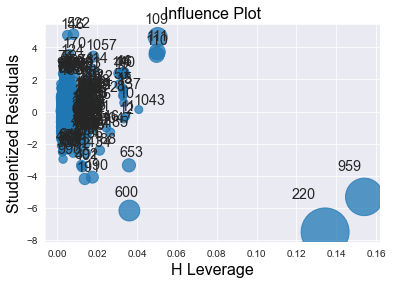

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [62]:
data.shape

(1435, 7)

In [63]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.016724738675958188

In [64]:
data=data.drop(data.index[220],axis=0).reset_index()

In [65]:
data.iloc[215:225,:]

,index,Price,Age,KM,HP,Doors,QTax,Weight
215,215,13500,33,75699,69,3,185,1105
216,216,10950,41,75697,97,3,69,1025
217,217,10950,44,74846,97,3,69,1025
218,218,12950,38,74319,110,5,85,1075
219,219,11950,43,74285,110,5,85,1075
220,221,11950,40,73042,110,5,85,1075
221,222,14950,44,71793,110,4,197,1067
222,223,12450,35,71200,110,5,85,1075
223,224,12950,38,67805,110,5,85,1075
224,225,11950,35,65988,110,3,69,1040


In [66]:
data=data.drop("index",axis=1)

In [67]:
data.iloc[215:225,:]

,Price,Age,KM,HP,Doors,QTax,Weight
215,13500,33,75699,69,3,185,1105
216,10950,41,75697,97,3,69,1025
217,10950,44,74846,97,3,69,1025
218,12950,38,74319,110,5,85,1075
219,11950,43,74285,110,5,85,1075
220,11950,40,73042,110,5,85,1075
221,14950,44,71793,110,4,197,1067
222,12450,35,71200,110,5,85,1075
223,12950,38,67805,110,5,85,1075
224,11950,35,65988,110,3,69,1040


In [68]:
model2 = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [69]:
model2.rsquared

0.8666728532499486

In [70]:
data.head

<bound method NDFrame.head of       Price  Age     KM   HP  Doors  QTax  Weight
0     13500   23  46986   90      3   210    1165
1     13750   23  72937   90      3   210    1165
2     13950   24  41711   90      3   210    1165
3     14950   26  48000   90      3   210    1165
4     13750   30  38500   90      3   210    1170
...     ...  ...    ...  ...    ...   ...     ...
1429   7500   69  20544   86      3    69    1025
1430  10845   72  19000   86      3    69    1015
1431   8500   71  17016   86      3    69    1015
1432   7250   70  16916   86      3    69    1015
1433   6950   76      1  110      5    19    1114

[1434 rows x 7 columns]>

In [71]:
model2_influence=model2.get_influence()
(c1, _)=model2_influence.cooks_distance

Text(0, 0.5, 'Cooks distance')

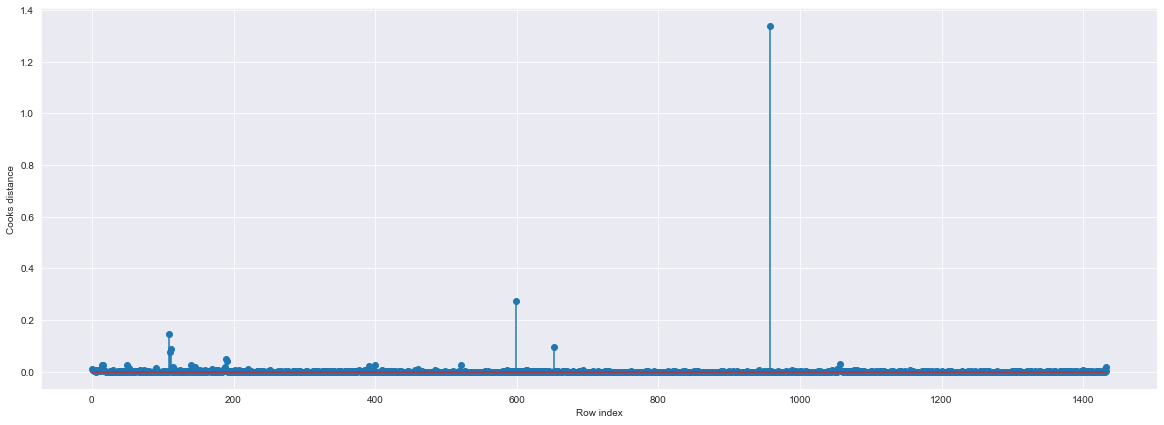

In [72]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c1,3))
plt.xlabel("Row index")
plt.ylabel("Cooks distance")

In [73]:
(np.argmax(c1),np.max(c1))

(958, 1.3402996914230993)

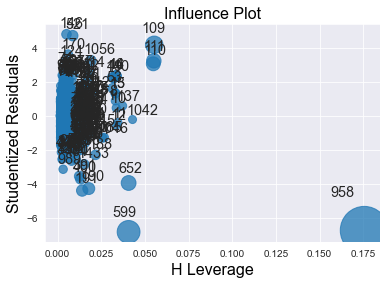

In [74]:
influence_plot(model2)
plt.show()

In [75]:
data=data.drop(data.index[958],axis=0).reset_index()

In [76]:
data=data.drop("index",axis=1)
data.iloc[953:958,:]

,Price,Age,KM,HP,Doors,QTax,Weight
953,8750,58,51712,110,3,69,1050
954,10950,58,51421,110,5,85,1105
955,8950,61,51235,86,4,69,1000
956,8950,65,51000,86,3,69,1015
957,8895,61,50925,110,5,85,1070


In [77]:
model3=smf.ols("Price~Age+KM+HP+Doors+QTax+Weight",data=data).fit()

In [78]:
model3.rsquared

0.8707773883293435

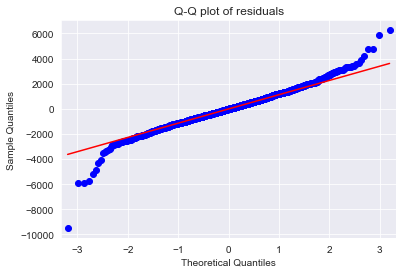

In [79]:
sm.qqplot(model3.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [80]:
Predicted=model3.fittedvalues

In [81]:
Errors=model3.resid

In [82]:
data['Predicted'] = Predicted
data['Errors'] = Errors

In [83]:
data

,Price,Age,KM,HP,Doors,QTax,Weight,Predicted,Errors
0,13500,23,46986,90,3,210,1165,16807.692483,-3307.692483
1,13750,23,72937,90,3,210,1165,16260.176738,-2510.176738
2,13950,24,41711,90,3,210,1165,16802.826307,-2852.826307
3,14950,26,48000,90,3,210,1165,16437.823729,-1487.823729
4,13750,30,38500,90,3,210,1170,16288.791032,-2538.791032
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,3,69,1025,8810.603810,-1310.603810
1429,10845,72,19000,86,3,69,1015,8264.364896,2580.635104
1430,8500,71,17016,86,3,69,1015,8422.381886,77.618114
1431,7250,70,16916,86,3,69,1015,8540.650133,-1290.650133


# model3 has the highest rsquared values so it is the best model